<AxesSubplot:>

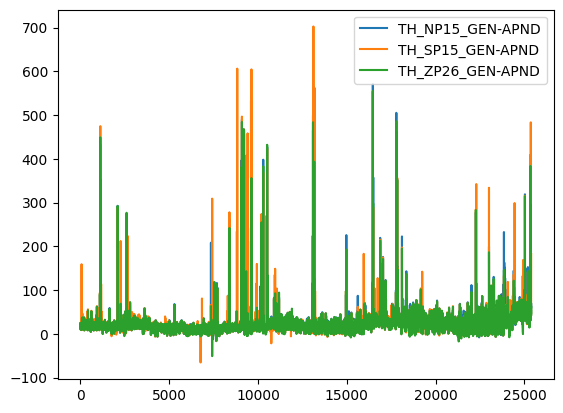

In [78]:
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import pacf,acf

df_dataset = pd.read_csv(r"..\\data\\dataset_dropNA.csv")

df_pricedata = df_dataset[['TH_NP15_GEN-APND','TH_SP15_GEN-APND','TH_ZP26_GEN-APND']]

df_pricedata.plot()yy

<AxesSubplot:>

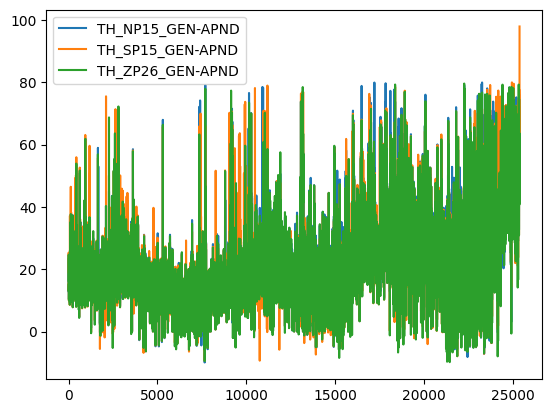

In [4]:
import numpy as np
df_pricedata = df_pricedata.apply(lambda x: [np.nan if y > 80 or y < -10 else y for y in x])
df_pricedata.interpolate(method='spline', order=1, limit=10, limit_direction='both',inplace=True)
df_pricedata.plot()

In [10]:
df_pricedata['TH_NP15_GEN-APND'].diff().describe()

count    25377.000000
mean         0.001758
std          5.305587
min        -62.750000
25%         -2.050000
50%         -0.130000
75%          1.710000
max         58.230000
Name: TH_NP15_GEN-APND, dtype: float64

Text(0, 0.5, 'Electricity price in USD/MWh')

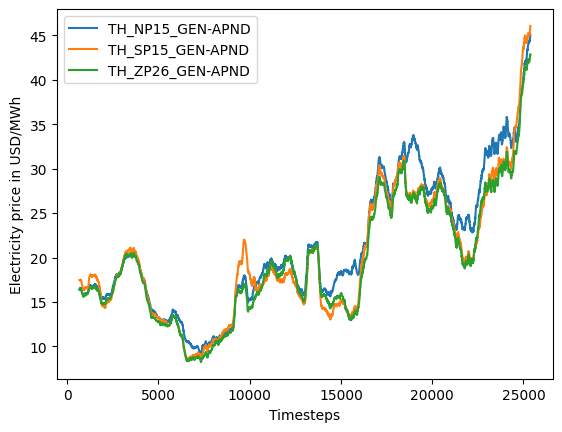

In [20]:

reliance = pd.DataFrame()
reliance['TH_NP15_GEN-APND'] = df_pricedata['TH_NP15_GEN-APND'].rolling(24*7*4).mean()
reliance['TH_SP15_GEN-APND'] = df_pricedata['TH_SP15_GEN-APND'].rolling(24*7*4).mean()
reliance['TH_ZP26_GEN-APND'] = df_pricedata['TH_ZP26_GEN-APND'].rolling(24*7*4).mean()

# removing all the NULL values using
# dropna() method
reliance.dropna(inplace=True)
 
# printing Dataframe
ax = reliance.plot()
ax.set_xlabel("Timesteps")
ax.set_ylabel("Electricity price in USD/MWh")

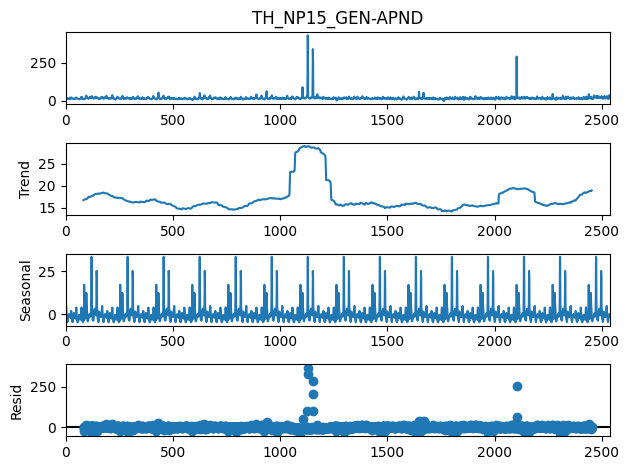

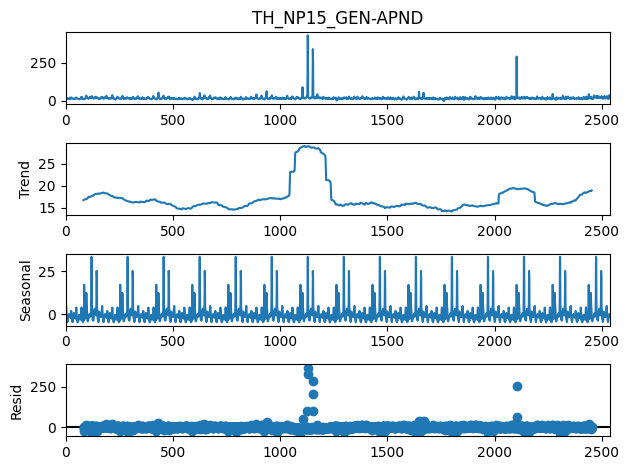

In [75]:
df_pricedata_bit = df_pricedata[(df_pricedata.index<np.percentile(df_pricedata.index, 10))]
result=seasonal_decompose(df_pricedata_bit['TH_NP15_GEN-APND'], model='Additive', period=168)
result.plot()

In [12]:
import os
weather_columns = {}
for file in os.listdir(r"..\\data\\weather_data"):
    df_weather = pd.read_csv(r"..\\data\\weather_data\\"+file)
    weather_columns[file] = df_weather.columns.tolist()



In [6]:
#columns = weather_columns['cloud_cover.csv']
df_cloudcover = pd.read_csv(r"..\\data\\weather_data\\cloud_cover.csv")
#df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
#df_cloudcover[['Alturas Cloud Cover Forecast']].plot()


,Alturas Cloud Cover Forecast,Baker Cloud Cover Forecast,Bakersfield Cloud Cover Forecast,Bishop Cloud Cover Forecast,Blue Canyon Cloud Cover Forecast,Brookings Cloud Cover Forecast,Burns Cloud Cover Forecast,Elko Cloud Cover Forecast,Ely Cloud Cover Forecast,Eureka Cloud Cover Forecast,...,San Francisco Cloud Cover Forecast,San Jose Cloud Cover Forecast,San Luis Obispo Cloud Cover Forecast,Santa Rosa Cloud Cover Forecast,Stockton Cloud Cover Forecast,The Dalles Cloud Cover Forecast,Tucson Cloud Cover Forecast,Winnemuca Cloud Cover Forecast,Yreka Cloud Cover Forecast,Yuma Cloud Cover Forecast
count,40942.000000,40941.000000,40930.000000,40885.000000,40962.000000,40967.000000,40969.000000,40904.000000,40939.000000,40935.000000,...,40950.000000,40946.000000,40875.000000,40906.000000,40961.000000,40971.000000,40932.000000,40943.000000,40967.000000,40964.000000
mean,35.571711,42.666422,22.039067,26.061269,31.030492,46.527522,39.649638,37.512077,35.101859,54.488555,...,41.653748,30.886094,38.777884,34.796558,27.156979,43.769813,25.087609,34.906138,35.892108,18.097720
std,30.574599,30.577443,25.935733,23.544225,31.125818,32.668730,30.729181,28.097988,26.846303,27.553754,...,28.361138,28.080792,32.757473,30.978542,28.500913,30.381036,24.397328,28.035196,30.591822,21.214938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,13.000000,2.000000,6.000000,4.000000,16.000000,9.000000,12.000000,11.000000,33.000000,...,18.000000,6.000000,10.000000,7.000000,4.000000,15.000000,4.000000,10.000000,7.000000,2.000000
50%,28.000000,42.000000,10.000000,19.000000,19.000000,44.000000,36.000000,33.000000,30.000000,55.000000,...,37.000000,22.000000,26.000000,25.000000,15.000000,43.000000,17.000000,28.000000,29.000000,9.000000
75%,61.000000,70.000000,35.000000,41.000000,52.000000,76.000000,67.000000,60.000000,56.000000,78.000000,...,64.000000,51.000000,71.000000,59.000000,45.000000,71.000000,41.000000,57.000000,61.000000,27.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:>

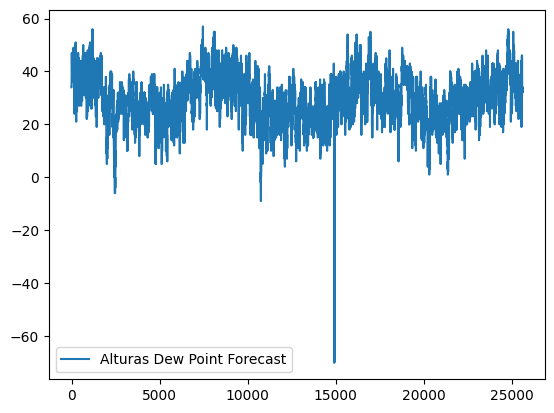

In [33]:
columns = weather_columns['dew_point.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['Alturas Dew Point Forecast']].plot()
result=seasonal_decompose(df_pricedata_bit['TH_NP15_GEN-APND'], model='Additive', period=168)



<AxesSubplot:>

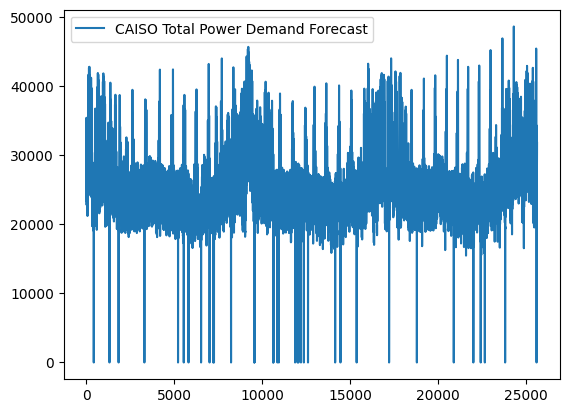

In [62]:
columns = weather_columns['forecasts.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['CAISO Total Power Demand Forecast']].plot()

<AxesSubplot:>

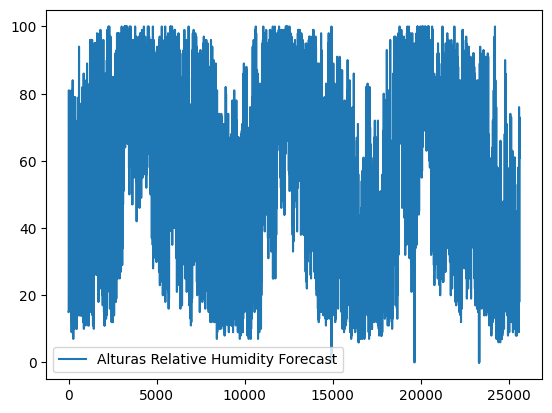

In [46]:
columns = weather_columns['relative_humidity.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['Alturas Relative Humidity Forecast']].plot()

<AxesSubplot:>

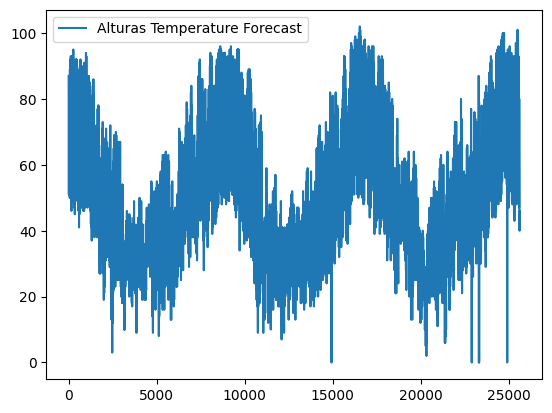

In [48]:
columns = weather_columns['temperature.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['Alturas Temperature Forecast']].plot()

<AxesSubplot:>

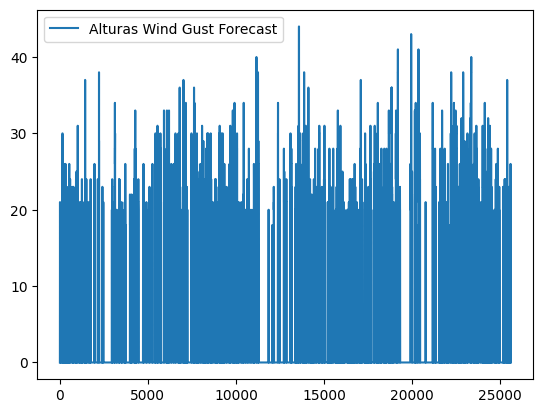

In [49]:
columns = weather_columns['wind_gust.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['Alturas Wind Gust Forecast']].plot()

<AxesSubplot:>

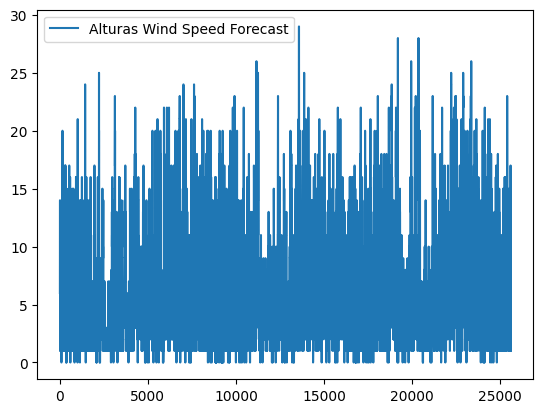

In [50]:
columns = weather_columns['wind_speed.csv']

df_cloudcover = df_dataset.loc[:,df_dataset.columns.isin(columns)]
df_cloudcover.describe()
df_cloudcover[['Alturas Wind Speed Forecast']].plot()

<AxesSubplot:>

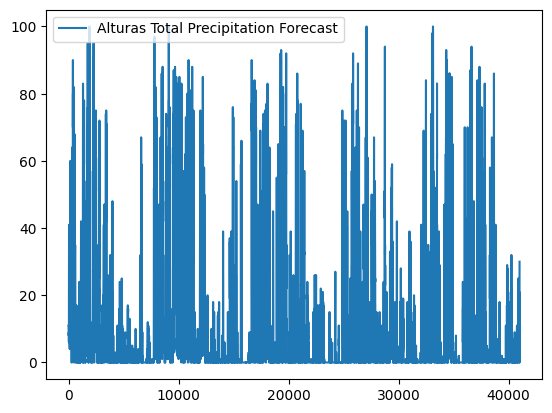

In [55]:
df_precipation_prob = pd.read_csv(r"..\\data\\weather_data\\precipitation_probability.csv")
df_precipation_prob.describe()
df_precipation_prob[['Alturas Total Precipitation Forecast']].plot()

<AxesSubplot:>

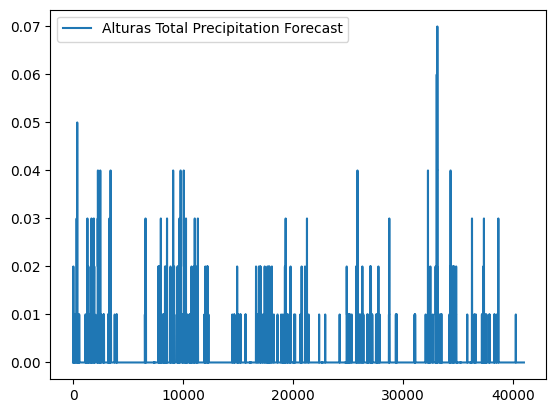

In [58]:
df_precipation_prob = pd.read_csv(r"..\\data\\weather_data\\total_precipitation.csv")
df_precipation_prob.describe()
df_precipation_prob[['Alturas Total Precipitation Forecast']].plot()

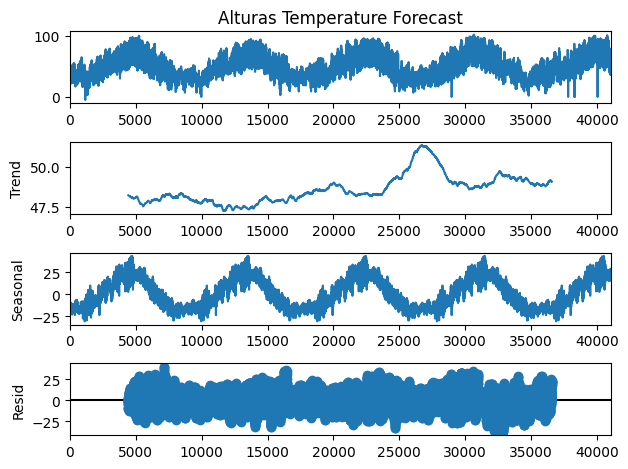

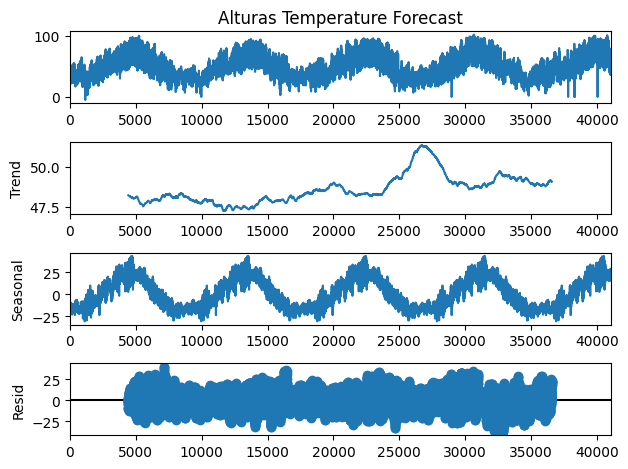

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv(r"..\\data\\weather_data\\temperature.csv")
#df['Alturas Temperature Forecast'].plot();
df.dropna(inplace=True)
result=seasonal_decompose(df['Alturas Temperature Forecast'], model='Multiplicative', period=24*365)
result.plot()